In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("C:\M.sc Data Science clg\DS SEM 2\Python Assignments\kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# 1.	Write script to check data types of each column 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [8]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
# 3.	Display data ranges for each column, find outliers. Correct if any.

In [12]:
# display data ranges for each column
print("Data Ranges:")
for col in data.columns:
    if data[col].dtype == 'int64' or data[col].dtype == 'float64':
        print(f"{col}: {data[col].min()} - {data[col].max()}")

# find outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

print("Outliers:")
print(outliers)

# remove outliers
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Outliers Removed")
print(data)


Data Ranges:
id: 1000102 - 9900000190
price: 75000.0 - 7700000.0
bedrooms: 0 - 33
bathrooms: 0.0 - 8.0
sqft_living: 290 - 13540
sqft_lot: 520 - 1651359
floors: 1.0 - 3.5
waterfront: 0 - 1
view: 0 - 4
condition: 1 - 5
grade: 1 - 13
sqft_above: 290 - 9410
sqft_basement: 0 - 4820
yr_built: 1900 - 2015
yr_renovated: 0 - 2015
zipcode: 98001 - 98199
lat: 47.1559 - 47.7776
long: -122.519 - -121.315
sqft_living15: 399 - 6210
sqft_lot15: 651 - 871200
Outliers:
bathrooms         571
bedrooms          546
condition          30
date                0
floors              0
grade            1911
id                  0
lat                 2
long              256
price            1146
sqft_above        611
sqft_basement     496
sqft_living       572
sqft_living15     544
sqft_lot         2425
sqft_lot15       2194
view             2124
waterfront        163
yr_built            0
yr_renovated      914
zipcode             0
dtype: int64
Outliers Removed
               id             date     price  bedroo

In [13]:
# 4.	List the attributes which influence flat prices.

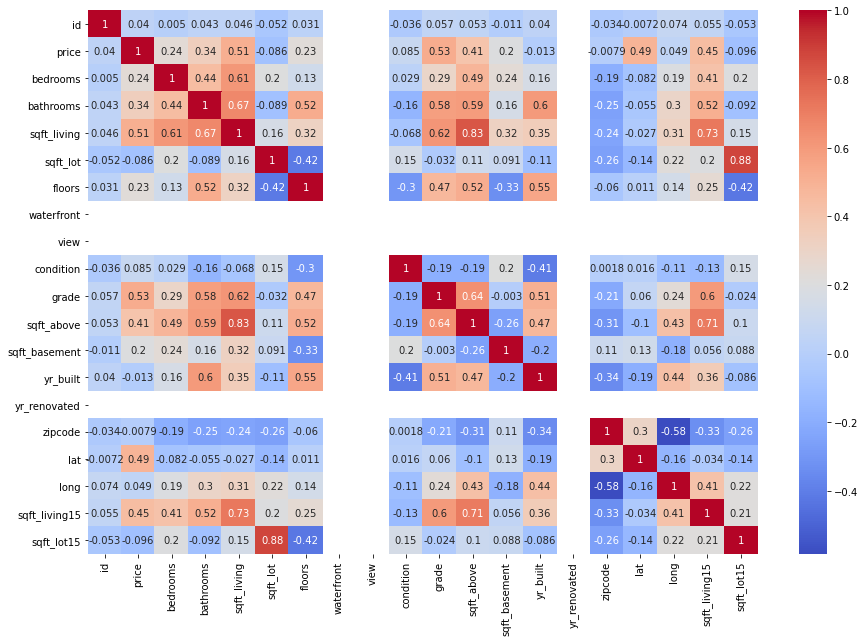

price            1.000000
grade            0.527572
sqft_living      0.514513
lat              0.490769
sqft_living15    0.447767
sqft_above       0.408315
bathrooms        0.340603
bedrooms         0.239879
floors           0.227823
sqft_basement    0.199982
condition        0.085148
long             0.049000
id               0.040186
zipcode         -0.007907
yr_built        -0.012925
sqft_lot        -0.085718
sqft_lot15      -0.095871
waterfront            NaN
view                  NaN
yr_renovated          NaN
Name: price, dtype: float64


In [14]:
# calculate correlations between variables
corr = data.corr()

# plot correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# display correlations with price
print(corr['price'].sort_values(ascending=False))


In [15]:
# 1.	Draw plot for Squared Ft Living data vs. House Price and share observations. Label the plot appropriately.

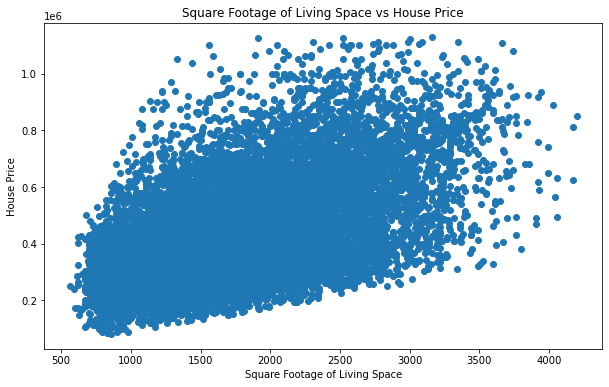

In [16]:
# plot square footage of living space vs price
plt.figure(figsize=(10, 6))
plt.scatter(data['sqft_living'], data['price'])
plt.title('Square Footage of Living Space vs House Price')
plt.xlabel('Square Footage of Living Space')
plt.ylabel('House Price')
plt.show()


In [17]:
# 2.	What is popular bedrooms size for houses in zip code area 98003

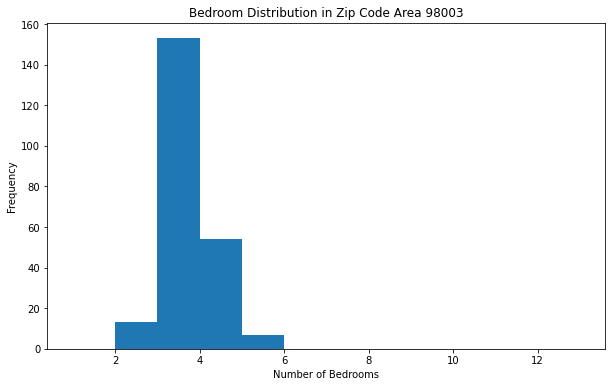

In [18]:
# filter dataset to zip code area 98003
zip_data = data[data['zipcode'] == 98003]

# plot histogram of bedroom distribution
plt.figure(figsize=(10, 6))
plt.hist(zip_data['bedrooms'], bins=range(1, 14))
plt.title('Bedroom Distribution in Zip Code Area 98003')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.show()

In [19]:
# 3.	Display Average pricing of houses per bedrooms size in zip code area 98003

In [20]:
# filter dataset to zip code area 98003
zip_data = data[data['zipcode'] == 98003]

# group data by number of bedrooms and calculate mean price
avg_prices = zip_data.groupby('bedrooms')['price'].mean()

print(avg_prices)

bedrooms
2    204954.076923
3    254418.333333
4    298124.814815
5    278492.857143
Name: price, dtype: float64


In [21]:
# 4.Plot stacked graph (stack of bedroom sizes) for number of flats per year built (years between 1978 to 2010)

<Figure size 720x432 with 0 Axes>

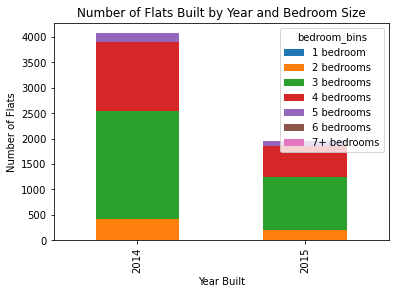

In [22]:
# filter dataset to only include houses built between 1978 and 2010
year_data = data[(data['yr_built'] >= 1978) & (data['yr_built'] <= 2010)]

# create bins for bedroom sizes
bins = [0, 1, 2, 3, 4, 5, 6, 33]
labels = ['1 bedroom', '2 bedrooms', '3 bedrooms', '4 bedrooms', '5 bedrooms', '6 bedrooms', '7+ bedrooms']
year_data['bedroom_bins'] = pd.cut(year_data['bedrooms'], bins=bins, labels=labels)

# convert date column to datetime format
year_data['date'] = pd.to_datetime(year_data['date'])

# create pivot table with number of flats built per year and bedroom size
pivot_table = year_data.pivot_table(values='id', index=year_data['date'].dt.year, columns='bedroom_bins', aggfunc='count')

# plot stacked bar graph
plt.figure(figsize=(10,6))
pivot_table.plot(kind='bar', stacked=True)
plt.title('Number of Flats Built by Year and Bedroom Size')
plt.xlabel('Year Built')
plt.ylabel('Number of Flats')
plt.show()
